In [1]:
import pandas as pd
from pyarrow import csv
import numpy as np
import networkx as nx
from functools import reduce
#import sweetviz as sv
import matplotlib.pyplot as plt

import timeit
import time

In [2]:
trainData_file=csv.read_csv('Data/trainData_final_nolinks_50k_day02.csv')
training_df2 =  trainData_file.to_pandas()
training_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp002915,0.001429,0.012001,2.017466,220248,5555.800000,Missing,8,2888,3.0,2972.0,1.0,991.333333,288.0,96.0,160.000000,0.0,0.0,0.0
1,ActiveDirectory,Comp003448,0.001048,0.002411,1.264516,167808,5552.600000,Missing,4,2888,7.0,2971.0,0.0,717.000000,288.0,96.0,137.142857,0.0,0.0,0.0
2,ActiveDirectory,Comp005774,0.001144,0.002185,1.368704,167808,5553.400000,Missing,3,2888,1.0,1202.0,1202.0,1202.000000,138.0,138.0,138.000000,0.0,0.0,0.0
3,ActiveDirectory,Comp006160,0.002000,0.142927,3.233054,367080,5560.600000,Missing,8,2888,2.0,1.0,0.0,0.500000,618.0,96.0,357.000000,0.0,0.0,0.0
4,ActiveDirectory,Comp007324,0.001334,0.004589,1.644425,230736,5555.000000,Missing,1,2888,4.0,3455.0,1.0,1402.000000,384.0,96.0,264.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546394,Comp378365,Comp485524,0.166667,0.000380,0.333844,110,2774.300000,NoLink,0,11,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546395,Comp928022,Comp270144,0.236842,0.001057,0.992423,462,2779.100000,NoLink,4,33,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546396,Comp940027,Comp814131,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,32,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
546397,Comp203056,Comp644901,0.000000,0.000000,0.000000,36,1847.933333,NoLink,2,18,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
testData_file=csv.read_csv('Data/testData_final_nolinks__50k_day02.csv')
testing_df2 =  testData_file.to_pandas()
testing_df2

,Source,Destination,JaccardIndex,ResourceAllocation,AdamicAdar,PreferentialAttachment,CommonNeighborCentrality,Label,in_degree,out_degree,counts,max_duration,min_duration,avg_duration,max_SrcBytes,min_SrcBytes,avg_SrcBytes,max_DstBytes,min_DstBytes,avg_DstBytes
0,ActiveDirectory,Comp000566,0.001477,0.258959,3.130220,227325,5683.800000,Missing,6,3602,1.0,86.0,86.0,86.000000,0.0,0.0,0.0,2327.0,2327.0,2327.0
1,ActiveDirectory,Comp002524,0.002213,0.008351,2.922840,465475,5690.200000,Missing,10,3602,6.0,4096.0,1.0,1400.666667,480.0,96.0,240.0,0.0,0.0,0.0
2,ActiveDirectory,Comp002907,0.001293,0.009648,1.742483,184025,5682.200000,Missing,2,3602,7.0,2070.0,1.0,296.571429,138.0,96.0,102.0,0.0,0.0,0.0
3,ActiveDirectory,Comp003489,0.001567,0.009273,2.117700,465475,5684.600000,Missing,6,3602,6.0,1.0,0.0,0.333333,96.0,96.0,96.0,0.0,0.0,0.0
4,ActiveDirectory,Comp005115,0.002030,0.007595,2.633240,368050,5688.600000,Missing,1,3602,1.0,0.0,0.0,0.000000,46.0,46.0,46.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554445,Comp235897,Comp505193,0.000000,0.000000,0.000000,154,1890.333333,NoLink,11,14,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554446,Comp804839,Comp363110,0.285714,0.001697,1.346786,680,2845.100000,NoLink,3,20,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554447,Comp079329,Comp257079,0.200000,0.000792,0.140047,9,2836.300000,NoLink,1,2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
554448,Comp838114,Comp937614,0.000000,0.000000,0.000000,0,0.000000,NoLink,0,10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_test, y_test = testing_df2[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment',  'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], testing_df2['Label']


In [5]:
len(training_df2[training_df2["Label"]=="Continuing"])


270005

In [6]:
len(training_df2[training_df2["Label"]=="Missing"])


95542

In [7]:
len(training_df2[training_df2["Label"]=="New"])

130870

In [8]:
len(training_df2[training_df2["Label"]=="NoLink"])

49982

In [9]:
len(testing_df2[testing_df2["Label"]=="Continuing"])

298500

In [10]:
len(testing_df2[testing_df2["Label"]=="Missing"])

102375

In [11]:
len(testing_df2[testing_df2["Label"]=="New"])

103600

In [12]:
TrainTest=[]
TrainTest.append(training_df2)
TrainTest.append(testing_df2)

In [13]:
trainData=training_df2.copy()

In [14]:
train_Cont_df=trainData[trainData["Label"]=="Continuing"]
train_Miss_df=trainData[trainData["Label"]=="Missing"]
train_New_df=trainData[trainData["Label"]=="New"]
train_NoLink_df=trainData[trainData["Label"]=="NoLink"]

In [15]:
# Step 5 Performance Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix

target_names=['Continuing','Missing', 'New','NoLink']
#report_2 = classification_report(y_test, pred, target_names=target_names)
#print(f"Test Score\t {pred}")
#print(report_2)

In [16]:
dfc=train_Cont_df.sample(n = 49000)
dfm=train_Miss_df.sample(n = 49000)
dfn=train_New_df.sample(n = 49000)
dfnl=train_NoLink_df.sample(n = 49000)

In [17]:
trainData_df3=pd.concat([dfc,dfm,dfn,dfnl],ignore_index=True)
X_train_3, y_train_3 = trainData_df3[['JaccardIndex', 'ResourceAllocation','AdamicAdar','PreferentialAttachment', 'CommonNeighborCentrality','counts','in_degree','out_degree','max_duration','min_duration','avg_duration','max_SrcBytes','min_SrcBytes','avg_SrcBytes','max_DstBytes','min_DstBytes','avg_DstBytes']], trainData_df3['Label']


In [18]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
rf_scores = rf_model.predict_proba(X_test)
rf_new_scores=rf_scores[:, 3]

In [19]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


AB_model = AdaBoostClassifier(n_estimators=100, random_state=0)
AB_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
AB_scores = AB_model.predict_proba(X_test)
AB_new_scores=AB_scores[:, 3]

In [20]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
gnb_scores = gnb_model.predict_proba(X_test)
gnb_new_scores=gnb_scores[:, 3]

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

XGB_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
XGB_model.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
XGB_scores = XGB_model.predict_proba(X_test)
XGB_new_scores=XGB_scores[:, 3]

In [22]:
#import svm model
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV

#LinearSVC  = make_pipeline(StandardScaler(),LinearSVC(dual=False, random_state=0, tol=1e-5))
#LinearSVC.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
#SVC_scores = LinearSVC.predict_proba(X_test)
#SVC_new_scores=SVC_scores[:, 2]

linear_svc = LinearSVC()
linear_svc.fit(X_train_3, y_train_3)
calibrated_svc = CalibratedClassifierCV(linear_svc, method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train_3, y_train_3)

# Predict probabilities for the positive class (index 1)
SVC_scores = calibrated_svc.predict_proba(X_test)
SVC_new_scores=SVC_scores[:, 3]


/home/asha/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
#import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
LR_scores = LogReg.predict_proba(X_test)
LR_new_scores=LR_scores[:, 3]

/home/asha/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#import MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

MLP_clf  = MLPClassifier(random_state=1, max_iter=300)
MLP_clf.fit(X_train_3, y_train_3)

# Use the trained model to predict probabilities for each class
MLP_scores = MLP_clf.predict_proba(X_test)
MLP_new_scores=MLP_scores[:, 3]

In [25]:
print(set(y_test))

{'Continuing', 'Missing', 'NoLink', 'New'}


In [26]:
y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 554450 entries, 0 to 554449
Series name: Label
Non-Null Count   Dtype 
--------------   ----- 
554450 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


In [27]:
# Assuming y_test is a pandas Series containing class labels
y_test_binary = (y_test == 'NoLink').astype(int)

In [28]:

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_new_scores)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#Adaboost
AB_fpr, AB_tpr, _ = roc_curve(y_test_binary, AB_new_scores)
AB_roc_auc = auc(AB_fpr, AB_tpr)

#Gradient Boosting Classifier
gnb_fpr, gnb_tpr, _ = roc_curve(y_test_binary, gnb_new_scores)
gnb_roc_auc = auc(gnb_fpr, gnb_tpr)

#Linear SVC
svc_fpr, svc_tpr, _ = roc_curve(y_test_binary, SVC_new_scores)
svc_roc_auc = auc(svc_fpr, svc_tpr)

#Logistic Regression
LR_fpr, LR_tpr, _ = roc_curve(y_test_binary, LR_new_scores)
LR_roc_auc = auc(LR_fpr, LR_tpr)

#MLP Classifier
MLP_fpr, MLP_tpr, _ = roc_curve(y_test_binary, MLP_new_scores)
MLP_roc_auc = auc(MLP_fpr, MLP_tpr)

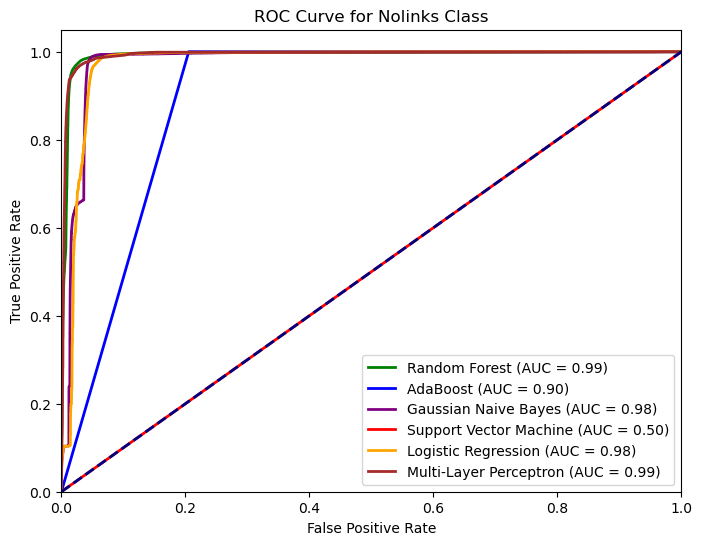

In [30]:
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model with unique colors and labels
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(AB_fpr, AB_tpr, color='blue', lw=2, label='AdaBoost (AUC = %0.2f)' % AB_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, color='purple', lw=2, label='Gaussian Naive Bayes (AUC = %0.2f)' % gnb_roc_auc)
plt.plot(svc_fpr, svc_tpr, color='red', lw=2, label='Support Vector Machine (AUC = %0.2f)' % svc_roc_auc)
plt.plot(LR_fpr, LR_tpr, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % LR_roc_auc)
plt.plot(MLP_fpr, MLP_tpr, color='brown', lw=2, label='Multi-Layer Perceptron (AUC = %0.2f)' % MLP_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Nolinks Class')
plt.legend(loc='lower right')
plt.show()

